## Overview:

Chronic kidney disease, also called chronic kidney failure, describes the gradual loss of kidney function. Your kidneys filter wastes and excess fluids from your blood, which are then excreted in your urine. When chronic kidney disease reaches an advanced stage, dangerous levels of fluid, electrolytes and wastes can build up in your body.

In the early stages of chronic kidney disease, you may have few signs or symptoms. Chronic kidney disease may not become apparent until your kidney function is significantly impaired.

Treatment for chronic kidney disease focuses on slowing the progression of the kidney damage, usually by controlling the underlying cause. Chronic kidney disease can progress to end-stage kidney failure, which is fatal without artificial filtering (dialysis) or a kidney transplant.


## Description:
Below code classifies patients as having chronic kidney disease(ckd) or not using Artificial Neural Network

<figure>
<img src="https://cdn-a.william-reed.com/var/wrbm_gb_food_pharma/storage/images/7/2/0/6/2496027-1-eng-GB/Excess-salt-may-raise-heart-disease-risk-in-kidney-patients-study-suggests.jpg" width=500 alt="A 2D sliding window.">
</figure>

### Importing relevant libraries

In [39]:
#Import libraries:

import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

### Loading the data:
Location of dataset: https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease

In [40]:
#Load the data:

from google.colab import files

uploaded = files.upload()
df = pd.read_csv('kidney_disease.csv')

#Print first few rows:

df.head()

Saving kidney_disease.csv to kidney_disease (1).csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


# **Data Set Information:**


We use the following representation to collect the dataset
- Age: (numerical)age in years
- Blood Pressure(numerical)
bp in mm/Hg
- Specific Gravity(nominal)
sg - (1.005,1.010,1.015,1.020,1.025)
- Albumin(nominal)
al - (0,1,2,3,4,5)
- Sugar(nominal)
su - (0,1,2,3,4,5)
- Red Blood Cells(nominal)
rbc - (normal,abnormal)
- Pus Cell (nominal)
pc - (normal,abnormal)
- Pus Cell clumps(nominal)
pcc - (present,notpresent)
- Bacteria(nominal)
ba - (present,notpresent)
- Blood Glucose Random(numerical)
bgr in mgs/dl
- Blood Urea(numerical)
bu in mgs/dl
- Serum Creatinine(numerical)
sc in mgs/dl
- Sodium(numerical)
sod in mEq/L
- Potassium(numerical)
pot in mEq/L
- Hemoglobin(numerical)
hemo in gms
- Packed Cell Volume(numerical)
- White Blood Cell Count(numerical)
wc in cells/cumm
- Red Blood Cell Count(numerical)
rc in millions/cmm
- Hypertension(nominal)
htn - (yes,no)
- Diabetes Mellitus(nominal)
dm - (yes,no)
- Coronary Artery Disease(nominal)
cad - (yes,no)
- Appetite(nominal)
appet - (good,poor)
- Pedal Edema(nominal)
pe - (yes,no)
- Anemia(nominal)
ane - (yes,no)
- Class (nominal)
class - (ckd,notckd)


In [41]:
df_backup = df.copy()
df_backup.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [42]:
#Changing column name for better understanding:
new_col={"bp":"blood_pressure","sg":"specific_gravity", "al":"albumin","su":"sugar","rbc":"red_blood_cells","pc":"pus_cell",
         "pcc":"pus_cell_clumps","ba":"bacteria","bgr":"blood_glucose_random","bu":"blood_urea","sc":"serum_creatinine",
         "sod":"sodium","pot":"potassium","hemo":"haemoglobin","pcv":"packed_cell_volume","wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count","htn":"hypertension","dm":"diabetes_mellitus","cad":"coronary_artery_disease",
          "appet":"appetite","pe":"pedal_edema","ane":"anemia"}


df.rename(columns=new_col, inplace=True)
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [43]:
#Get the shape of the data:
df.shape

(400, 26)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [45]:
#taking a look at the data
df.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [46]:
df.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

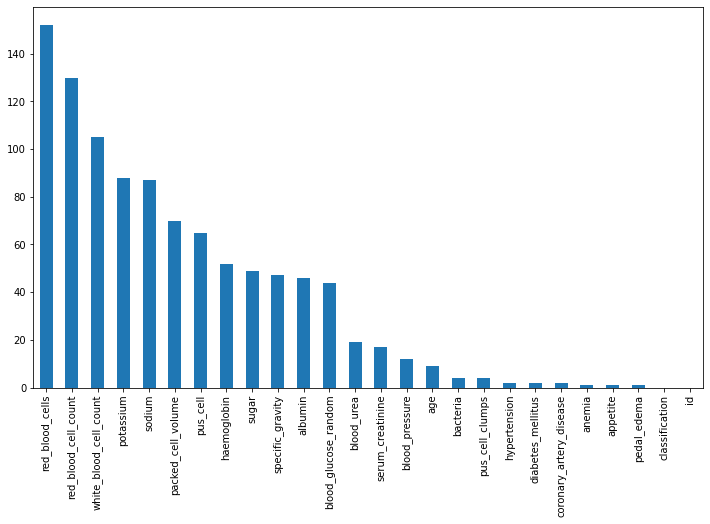

In [47]:
#A look at the null values using bar graphs:

plt.subplots(figsize=(12, 7))
((df.isnull().sum())).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [48]:
#Treating Special chars and NaNs and missing values
df = df.replace("\t?", np.nan)
df = df.replace(" ?", np.nan)
df = df.fillna(method='ffill')
df = df.fillna(method='backfill')

df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,111.0,2.5,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,0.8,111.0,2.5,11.3,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,111.0,2.5,9.6,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,111.0,2.5,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [49]:
#Transform the non-numeric data in the columns
#for column in df.columns:
#  if df[column].dtype == np.number:
#    continue
#  df[column] = LabelEncoder().fit_transform(df[column])

In [50]:
#Transform tonumeric data in the columns
df[['red_blood_cells','pus_cell']] = df[['red_blood_cells','pus_cell']].replace(to_replace={'abnormal':1,'normal':0})
df[['pus_cell_clumps','bacteria']] = df[['pus_cell_clumps','bacteria']].replace(to_replace={'present':1,'notpresent':0})
df[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']] = df[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']].replace(to_replace={'yes':1,'no':0})
df[['appetite']] = df[['appetite']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace='\tno',value=0)
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1,'ckd\t':1,'notckd':0,'no':0})
df['pedal_edema'] = df['pedal_edema'].replace(to_replace='good',value=0) 
df['appetite'] = df['appetite'].replace(to_replace='no',value=0)
df['coronary_artery_disease']=df['coronary_artery_disease'].replace('yes',1)

In [51]:
df.tail()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
395,395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,0,0,0,1,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,0,0,0,1,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,0,0,0,1,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,0,0,0,1,0,0,0
399,399,58.0,80.0,1.025,0.0,0.0,0,0,0,0,131.0,18.0,1.1,141.0,3.5,15.8,53,6800,6.1,0,0,0,1,0,0,0


In [52]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,1.2,111.0,2.5,15.4,44,7800,5.2,1,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,121.0,18.0,0.8,111.0,2.5,11.3,38,6000,5.2,0,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,1.8,111.0,2.5,9.6,31,7500,5.2,0,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,1.4,111.0,2.5,11.6,35,7300,4.6,0,0,0,1,0,0,1


In [53]:
#Drop id column:
df.drop(["id"],inplace=True,axis=1)

In [54]:
#Fill na values:
df['age']=df['age'].fillna(np.mean(df['age']))
df['blood_pressure']=df['blood_pressure'].fillna(np.mean(df['blood_pressure']))
df['albumin']=df['albumin'].fillna(np.mean(df['albumin']))
df['specific_gravity']=df['specific_gravity'].fillna(np.mean(df['specific_gravity']))
df['sugar']=df['sugar'].fillna(np.mean(df['sugar']))
df['blood_glucose_random']=df['blood_glucose_random'].fillna(np.mean(df['blood_glucose_random']))
df['blood_urea']=df['blood_urea'].fillna(np.mean(df['blood_urea']))
df['serum_creatinine']=df['serum_creatinine'].fillna(np.mean(df['serum_creatinine']))
df['haemoglobinhaemoglobin']=df['haemoglobin'].fillna(np.mean(df['haemoglobin']))
df['potassium']=df['potassium'].fillna(np.mean(df['potassium']))
df['sodium']=df['sodium'].fillna(np.mean(df['sodium']))


In [55]:
df.isna().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
haemoglobinhaemoglobin     0
dtype: int64

In [56]:
#Print the first five rows of the new cleaned dataset:
df.tail(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification,haemoglobinhaemoglobin
390,52.0,80.0,1.025,0.0,0.0,0,0,0,0,99.0,25.0,0.8,135.0,3.7,15.0,52,6300,5.3,0,0,0,1,0,0,0,15.0
391,36.0,80.0,1.025,0.0,0.0,0,0,0,0,85.0,16.0,1.1,142.0,4.1,15.6,44,5800,6.3,0,0,0,1,0,0,0,15.6
392,57.0,80.0,1.020,0.0,0.0,0,0,0,0,133.0,48.0,1.2,147.0,4.3,14.8,46,6600,5.5,0,0,0,1,0,0,0,14.8
393,43.0,60.0,1.025,0.0,0.0,0,0,0,0,117.0,45.0,0.7,141.0,4.4,13.0,54,7400,5.4,0,0,0,1,0,0,0,13.0
394,50.0,80.0,1.020,0.0,0.0,0,0,0,0,137.0,46.0,0.8,139.0,5.0,14.1,45,9500,4.6,0,0,0,1,0,0,0,14.1
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,0,0,0,1,0,0,0,15.7
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,0,0,0,1,0,0,0,16.5
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,0,0,0,1,0,0,0,15.8
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,0,0,0,1,0,0,0,14.2
399,58.0,80.0,1.025,0.0,0.0,0,0,0,0,131.0,18.0,1.1,141.0,3.5,15.8,53,6800,6.1,0,0,0,1,0,0,0,15.8


In [57]:
#Split the data into independent (X) dataset and dependent(y) dataset:

X = df.drop(['classification'], axis = 1)
y = df['classification']

In [58]:
#Feature Scaling: min-max scaler method scales datsset so that all the i/p features lie between 0 and 1:

x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [59]:
#Split the data into 80% trainign and 20% testing:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=True)

Before we get started, lets understand below concepts.

### ***What are Artificial Neural Networks and Deep Neural Networks?***

 

**Artificial Neural Networks (ANN)** is a supervised learning system built of a large number of simple elements, called neurons or perceptrons. Each neuron can make simple decisions, and feeds those decisions to other neurons, organized in interconnected layers. Together, the neural network can emulate almost any function, and answer practically any question, given enough training samples and computing power. A “shallow” neural network has only three layers of neurons:

- An input layer that accepts the independent variables or inputs of the model
- One hidden layer
- An output layer that generates predictions

**A Deep Neural Network (DNN)** has a similar structure, but it has two or more “hidden layers” of neurons that process inputs. Goodfellow, Bengio and Courville showed that while shallow neural networks are able to tackle complex problems, deep learning networks are more accurate, and improve in accuracy as more neuron layers are added. Additional layers are useful up to a limit of 9-10, after which their predictive power starts to decline. Today most neural network models and implementations use a deep network of between 3-10 neuron layers

![Img](https://missinglink.ai/wp-content/uploads/2018/11/networkgraph-1.png)


## Making the ANN:

Listing out the steps involved in training the ANN with Stochastic Gradient Descent:-

1)Randomly initialize the weights to small numbers close to 0(But not 0).

2)Input the 1st observation of your dataset in the Input Layer, each Feature in one Input Node.

3)Forward-Propagation from Left to Right, the neurons are activated in a way that the impact of each neuron’s activation is limited by the weights. Propagate the activations until getting the predicted result y.

4)Compare the predicted result with the actual result. Measure the generated error.

5)Back-Propagation: From Right to Left, Error is back propagated.Update the weights according to how much they are
responsible for the error.The Learning Rate tells us by how much such we update the weights.

6)Repeat Steps 1 to 5 and update the weights after each observation(Reinforcement Learning).
Or: Repeat Steps 1 to 5 but update the weights only after a batch of observations(Batch Learning).

7)When the whole training set is passed through the ANN.That completes an Epoch. Redo more Epochs.

**Importing the Keras libraries and packages**

`import keras`

**For building the Neural Network layer by layer**

`from keras.models import Sequential`

**To randomly initialize the weights to small numbers close to 0(But not 0)**

`from keras.layers import Dense`

### **Initializing the ANN…**

So there are actually 2 ways of initializing a deep learning model
- Defining each layer one by one
- Defining a Graph

We did not put any parameter in the Sequential object as we will be defining the Layers manually

`model = Sequential()`


### **Adding the input layer and the first hidden layer…**

This remains an unanswered question till date that how many nodes of the hidden layer do we actually need?

There is no thumb rule but you can set the number of nodes in Hidden Layers as an Average of the number of Nodes in Input and Output Layer Respectively.(Works in 90% of the cases!!)

- Here avg= (26+1)/2==>13 .So set Output Dim=13
- Init will initialize the Hidden Layer weights uniformly
- Activation Function is Rectifier Activation Function(Relu)

Input dim tells us the number of nodes in the Input Layer.This is done only once and wont be specified in further layers.

`classifier.add(Dense(output_dim = 13, init = 'uniform', activation = 'relu', input_dim = 23))`


### **Adding the second hidden layer…**

`classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))`

### **Adding the output layer…**

`classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))`


*Sigmoid activation function is used whenever we need Probabilities of 2 categories or less(Similar to Logistic Regression).
Switch to Softmax when the dependent variable has more than 2 categories.*

In [60]:
#Build the model:

model = Sequential()
model.add(Dense(256, input_dim = len(X.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1, activation = 'hard_sigmoid'))



### **Compiling the ANN…**

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [61]:
#Compile the model:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])#since there are only two classes using binary_crossentropy

### **Fitting the ANN to the Training set**
model.fit(): Trains the model for a fixed number of epochs(iterations on the data)

In [62]:
#Train the model:
history = model.fit(X_train, y_train, epochs = 20,batch_size = X_train.shape[0])#epoch=2000

Epoch 1/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.8125
Epoch 2/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.9812
Epoch 3/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6203 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 1ms/step - loss: 0.5612 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 942us/step - loss: 0.5304 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.9969
Epoch 9/20
1/1 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.9937
Epoch 10/20
1/1 [==============================] - 0s 3ms/step - loss: 0.3902 - accuracy: 0.9906
Epoch 11/20
1/1 [====================

In [63]:
#Save the model:
model.save('ckd.model')

INFO:tensorflow:Assets written to: ckd.model/assets


Text(0.5, 0, 'epoch')

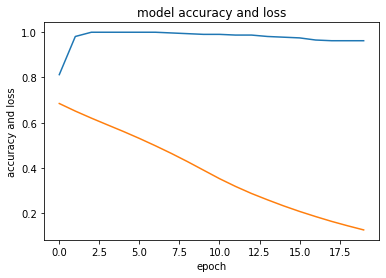

In [64]:
#Visualize the model's loss and accuracy:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [65]:
print('shape of training data: ',X_train.shape)
print('shape of the test data', X_test.shape)

shape of training data:  (320, 25)
shape of the test data (80, 25)



### **Making the predictions and evaluating the model**
Predicting the Test set results

In [66]:
#Probabilities
pred = model.predict(X_test)
pred


array([[0.09630337],
       [0.15219471],
       [1.        ],
       [0.13497451],
       [1.        ],
       [1.        ],
       [0.073807  ],
       [0.07772255],
       [1.        ],
       [0.11182198],
       [1.        ],
       [0.0742152 ],
       [1.        ],
       [1.        ],
       [0.10080841],
       [1.        ],
       [0.08344355],
       [1.        ],
       [0.08213523],
       [1.        ],
       [0.75504935],
       [0.08672407],
       [0.08779964],
       [0.11364725],
       [0.08712038],
       [0.32055086],
       [0.7296635 ],
       [0.08042002],
       [1.        ],
       [0.36839148],
       [1.        ],
       [0.10736987],
       [0.9277899 ],
       [0.75465035],
       [0.5224034 ],
       [0.54631656],
       [0.11812243],
       [0.41415456],
       [0.10677594],
       [0.67314756],
       [0.9197507 ],
       [0.23109207],
       [0.03742164],
       [0.05531076],
       [1.        ],
       [1.        ],
       [0.12867314],
       [0.118

If y_pred is larger than 0.5 it returns true(1) else false(0)

In [67]:
pred = [1 if y>0.5 else 0 for y in pred]

In [68]:
#Show actual values vs predicted values:
print('Original: {0}'.format(','.join(str(x) for x in y_test)))
print('Predicted: {0}'.format(','.join(str(x) for x in pred)))

Original: 0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,0,1,0,1,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,1,0,1,1,1,0,1,1,0,1,1
Predicted: 0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,1,1


In [69]:
from sklearn.metrics import f1_score,recall_score,precision_score,balanced_accuracy_score, roc_curve, auc, confusion_matrix, classification_report,accuracy_score
accuracy = accuracy_score(y_test,pred)
print('Accuracy: %f' % accuracy)
accuracy = balanced_accuracy_score(y_test,pred)
print('Balanced_Accuracy: %f' % accuracy)
precision = precision_score(y_test,pred)
print('Precision: %f' % precision)
recall = recall_score(y_test,pred)
print('Recall: %f' % recall)
f1 = f1_score(y_test,pred)
print('F1 score: %f' % f1)

Accuracy: 0.912500
Balanced_Accuracy: 0.925532
Precision: 1.000000
Recall: 0.851064
F1 score: 0.919540


In [70]:
print(accuracy)

0.925531914893617


### Conclusion:

This model provides an accouracy of 92% which is pretty good for epoch =20.

This notebook provides a hands on approach to learning implementation of deep learning(ANN) for tabular data. Over the last couple of years there has been a great success with using Deep Neural Networks for tabular data regression and classification. With notable Deep Learning Practitioners, using deep neural networks 90% of the time and usually Random Forests or other approaches for the remaining 10%.

Deep Neural Networks are both reliable and effective for making predictions on tabular data. 

### License:
Copyright 2020 Shruti Patil

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CO